In [8]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from matplotlib import rc
%matplotlib inline

# 주피터 노트북 한글 설정
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False=

### NB, kNN, Logistic, SVM 비교

In [9]:
# Load datasets
cancer = pd.read_csv('data/wdbc2.csv', header=None)

In [10]:
# column[0] = id, column[1] = malignity or benign
y = cancer[1]
x = cancer.drop([0,1], axis=1) # axis = 1 일 때 세로축 삭제

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [12]:
# GaussianNB
NB = GaussianNB().fit(X_train, y_train)

# kNN (n_neighbors 입력)
kNN = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

# Logistic (C 입력, penalty "l1" or "l2")
logistic = LogisticRegression(C=100, penalty="l1").fit(X_train, y_train)

# SVM (C 입력, gamma 입력)
svm = SVC(kernel='rbf', C=1, gamma=1).fit(X_train, y_train)

# DecisionTree (max_depth 입력)
tree = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)

# Random Forest (랜덤 숲)
forest = RandomForestClassifier(n_estimators=5, random_state=2).fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [13]:
# 점수
print("GaussianNB 훈련 세트 점수 : {:.3f}".format(NB.score(X_train, y_train)))
print("GaussianNB 테스트 세트 점수 : {:.3f}".format(NB.score(X_test, y_test)))
print("============================================")
print("kNN 훈련 세트 점수 : {:.3f}".format(kNN.score(X_train, y_train)))
print("kNN 테스트 세트 점수 : {:.3f}".format(kNN.score(X_test, y_test)))
print("============================================")
print("Logistic 훈련 세트 점수 : {:.3f}".format(logistic.score(X_train, y_train)))
print("Logistic 테스트 세트 점수 : {:.3f}".format(logistic.score(X_test, y_test)))
print("============================================")
print("SVM 훈련 세트 점수 : {:.3f}".format(svm.score(X_train, y_train)))
print("SVM 테스트 세트 점수 : {:.3f}".format(svm.score(X_test, y_test)))
print("============================================")
print("Tree 훈련 세트 점수 : {:.3f}".format(tree.score(X_train, y_train)))
print("Tree 테스트 세트 점수 : {:.3f}".format(tree.score(X_test, y_test)))
print("============================================")
print("Forest 훈련 세트 점수 : {:.3f}".format(forest.score(X_train, y_train)))
print("Forset 테스트 세트 점수 : {:.3f}".format(forest.score(X_test, y_test)))

GaussianNB 훈련 세트 점수 : 0.938
GaussianNB 테스트 세트 점수 : 0.947
kNN 훈련 세트 점수 : 0.947
kNN 테스트 세트 점수 : 0.947
Logistic 훈련 세트 점수 : 0.985
Logistic 테스트 세트 점수 : 0.974
SVM 훈련 세트 점수 : 1.000
SVM 테스트 세트 점수 : 0.614
Tree 훈련 세트 점수 : 0.976
Tree 테스트 세트 점수 : 0.947
Forest 훈련 세트 점수 : 0.993
Forset 테스트 세트 점수 : 0.947


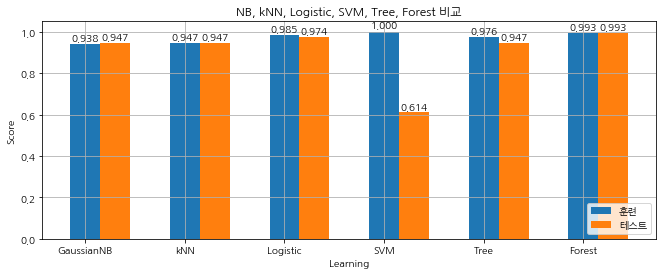

In [14]:
# 시각화
learning = ["GaussianNB", "kNN", "Logistic", "SVM", "Tree","Forest"]
data1 = [NB.score(X_train, y_train), kNN.score(X_train, y_train), logistic.score(X_train, y_train), svm.score(X_train, y_train), tree.score(X_train, y_train),forest.score(X_train,y_train)]
data2 = [NB.score(X_test, y_test), kNN.score(X_test, y_test), logistic.score(X_test, y_test), svm.score(X_test, y_test), tree.score(X_test, y_test),forest.score(X_train,y_train)]

fig, ax = plt.subplots(1,1,figsize=(11,4))
W_ = 0.3

x = np.arange(6)
bar1 = ax.bar(x, data1, align='center', width=W_, label='훈련')
bar2 = ax.bar([i+W_ for i in range(len(data2))], data2, align='center', width=W_, label='테스트')
plt.xticks(x, learning)

for i, bar in enumerate(bar1):
    ax.text(bar.get_x() + bar.get_width() / 2.0, 1.02 * bar.get_height(), '%.3f' % data1[i], ha='center')

for i, bar in enumerate(bar2):
    ax.text(bar.get_x() + bar.get_width() / 2.0, 1.02 * bar.get_height(), '%.3f' % data2[i], ha='center')
    
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Learning')
plt.ylabel('Score')
plt.title('NB, kNN, Logistic, SVM, Tree, Forest 비교')

plt.show()

In [15]:
# 기입값
x = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
data = np.zeros((10,30))

for i in range(10):
    data[i] = X_train.iloc[0, :]
    for j in range(i):
        data[i] += x

In [16]:
for k in data:
    print("GaussianNB 예측 결과 : {:}".format(NB.predict([k])))
    print("kNN 예측 결과 : {:}".format(kNN.predict([k])))
    print("Logistic 예측 결과 : {:}".format(logistic.predict([k])))
    print("SVM 예측 결과 : {:}".format(svm.predict([k])))
    print("Tree 예측 결과 : {:}".format(tree.predict([k])))
    print("Forest 예측 결과 : {:}".format(forest.predict([k])))
    print('=======================================')

GaussianNB 예측 결과 : ['B']
kNN 예측 결과 : ['B']
Logistic 예측 결과 : ['B']
SVM 예측 결과 : ['B']
Tree 예측 결과 : ['B']
Forest 예측 결과 : ['B']
GaussianNB 예측 결과 : ['M']
kNN 예측 결과 : ['B']
Logistic 예측 결과 : ['M']
SVM 예측 결과 : ['B']
Tree 예측 결과 : ['M']
Forest 예측 결과 : ['M']
GaussianNB 예측 결과 : ['M']
kNN 예측 결과 : ['B']
Logistic 예측 결과 : ['M']
SVM 예측 결과 : ['B']
Tree 예측 결과 : ['M']
Forest 예측 결과 : ['M']
GaussianNB 예측 결과 : ['M']
kNN 예측 결과 : ['B']
Logistic 예측 결과 : ['M']
SVM 예측 결과 : ['B']
Tree 예측 결과 : ['M']
Forest 예측 결과 : ['M']
GaussianNB 예측 결과 : ['M']
kNN 예측 결과 : ['B']
Logistic 예측 결과 : ['M']
SVM 예측 결과 : ['B']
Tree 예측 결과 : ['M']
Forest 예측 결과 : ['M']
GaussianNB 예측 결과 : ['M']
kNN 예측 결과 : ['B']
Logistic 예측 결과 : ['M']
SVM 예측 결과 : ['B']
Tree 예측 결과 : ['M']
Forest 예측 결과 : ['M']
GaussianNB 예측 결과 : ['M']
kNN 예측 결과 : ['B']
Logistic 예측 결과 : ['M']
SVM 예측 결과 : ['B']
Tree 예측 결과 : ['M']
Forest 예측 결과 : ['M']
GaussianNB 예측 결과 : ['M']
kNN 예측 결과 : ['B']
Logistic 예측 결과 : ['M']
SVM 예측 결과 : ['B']
Tree 예측 결과 : ['M']
Forest 예측 결과 : ['M']
Gaussian